In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np


In [2]:
df = pd.read_csv("normalized-diabetes.csv", header=None)
df.head()

,0,1,2,3,4,5,6,7,8
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.259091,0.617284,1.0
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.145041,0.382716,0.0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.277686,0.395062,1.0
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.069008,0.259259,0.0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.945455,0.407407,1.0


In [3]:
df_with_diabetes = df[df[8] == 1.0].iloc[:,:-1]
df_with_diabetes.iloc[:,:8].head()

,0,1,2,3,4,5,6,7
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.259091,0.617284
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.277686,0.395062
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.945455,0.407407
6,0.176471,0.391960,0.409836,0.323232,0.104019,0.461997,0.102479,0.320988
8,0.117647,0.989950,0.573770,0.454545,0.641844,0.454545,0.065289,0.654321


In [45]:
k_error = []
X = df_with_diabetes.iloc[:,:8]

for k in range(1,10):
    total = 0
    print('k = {}'.format(k))
    model = KMeans(n_clusters=k).fit(X)
    model.cluster_centers_

    for i in range(k):
        print("Cluster {} Center: {}".format(i, model.cluster_centers_[i]))
        print("==========================================================")

    print('\n')
    
    df_with_diabetes['Cluster'] = model.labels_

    groupings = []

    for i in range(k):
        num_members = len(df_with_diabetes[df_with_diabetes['Cluster'] == i])
        print("Cluster {} Num Members: {}".format(i, num_members))
        
        groupings.append(df_with_diabetes[df_with_diabetes['Cluster'] == i])

    print('\n')

    for i in range(len(groupings)):
        d = 0
        centers = model.cluster_centers_[i]
        for j in range(len(groupings[i])):
            d += np.linalg.norm(groupings[i].iloc[j, :8].values - centers)
        
        print("Cluster {} Error: {}".format(i, d))
        total += d
    k_error.append([k, total])

    print("Final Error: {}".format(total))
    print("==========================================================")
print(k_error)


k = 1
Cluster 0 Center: [0.28621598 0.7098365  0.58052973 0.2238806  0.11860026 0.52373379
 0.22747934 0.45761931]


Cluster 0 Num Members: 268


Cluster 0 Error: 118.40145767446779
Final Error: 118.40145767446779
k = 2
Cluster 0 Center: [0.10886743 0.72268057 0.54679471 0.26330469 0.14803641 0.53963788
 0.25093746 0.37884651]
Cluster 1 Center: [0.46356453 0.69699242 0.61426474 0.18445651 0.08916411 0.5078297
 0.20402122 0.53639211]


Cluster 0 Num Members: 134
Cluster 1 Num Members: 134


Cluster 0 Error: 53.40782021763029
Cluster 1 Error: 51.88207404401892
Final Error: 105.28989426164921
k = 3
Cluster 0 Center: [0.09945421 0.73024918 0.60081122 0.35166094 0.19495016 0.54977184
 0.26188123 0.37800687]
Cluster 1 Center: [0.51506456 0.68911631 0.62914834 0.30574033 0.15389494 0.52524445
 0.24890647 0.53914484]
Cluster 2 Center: [0.27891606 0.70667946 0.5136305  0.00919305 0.00286875 0.4939634
 0.17024329 0.46927452]


Cluster 0 Num Members: 97
Cluster 1 Num Members: 82
Cluster 2 Num Mem

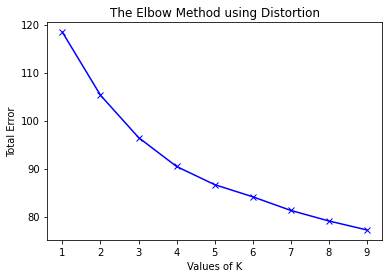

In [46]:
import matplotlib.pyplot as plt
k_error = np.array(k_error)
plt.plot(k_error[:,0], k_error[:,1], 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Total Error')
plt.title('The Elbow Method using Distortion')
plt.show()